In [29]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [30]:
## Step 1: Reading the data
passenger_list = 'train.csv'
df = pd.read_csv(passenger_list)
#show first 5 to check
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


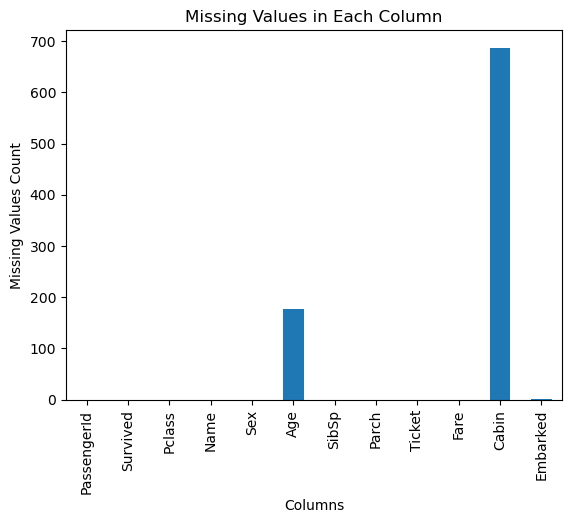

The column has the most NaN values is 'Cabin' with 687 empty cells.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S


In [31]:
## Step 2: Cleaning the data
%matplotlib inline

#quick look at the missing value with missingno
# msno.matrix(df.sample(250))

#showing missing value for each column in a bar chart
missing_values = df.isnull().sum()
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()

#find out which column has the most 'NaN' values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()
print(f"The column has the most NaN values is '{max_missing_column}' with {max_missing_count} empty cells.")

#drop the missing value in column embarked
df = df.dropna(subset=['Embarked'])

#filling up empty cabins cell
df['Cabin'].fillna('**¯\\_(ツ)_/¯**', inplace=True)

# show first 5 to check
df.head()

In [32]:
## Step 3: Feature extraction
#create new column to count family members
df['FamilyCount'] = df['SibSp'] + df['Parch']

#check if they are preachers
df['IsReverend'] = df['Name'].apply(lambda x: 1 if 'Rev' in x else 0)
df.sort_values(by='IsReverend', ascending=False).head()

#creating 2 dummies by extracting embarked and sex
dummy_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
dummy_sex = pd.get_dummies(df['Sex'],prefix = 'Sex')
df = pd.concat([df, dummy_embarked, dummy_sex], axis=1)

#bonus extract title out of name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title'],
      dtype='object')

In [34]:
## Step 4: Exploratory analysis

#1. What was the survival rate overall?
survival_rate = df['Survived'].mean()
print(f'The overall survival rate is: {survival_rate}')

The overall survival rate is: 0.38245219347581555


In [35]:
#2. Which gender fared the worst? What was their survival rate?
gender_survival = df.groupby('Sex')['Survived'].mean()
print(gender_survival)
print(f"The gender {gender_survival.idxmin()} has the worst survival rate of {gender_survival.min()}")

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64
The gender male has the worst survival rate of 0.18890814558058924


In [36]:
#3. What was the survival rate for each `Pclass`?
pclass_survival = df.groupby('Pclass')['Survived'].mean()
print(pclass_survival)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [37]:
#4. Did any reverends survive? How many?
reverends_survived = df[df['IsReverend'] == 1]['Survived'].sum()
print(f"{reverends_survived} of reverends survived.")

0 of reverends survived.


In [38]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
cabin_survived = df[df['Cabin'] == '**¯\\_(ツ)_/¯**']['Survived'].mean()
print(f"Survival rate of cabin crew with **¯\\_(ツ)_/¯**: {cabin_survived}")

Survival rate of cabin crew with **¯\_(ツ)_/¯**: 0.29985443959243085


In [39]:
#6. What is the survival rate for people whose `Age` is empty?
age_empty_survived = df[df['Age'].isnull()]['Survived'].mean()
print(f"Survival rate of non age: {age_empty_survived}")

Survival rate of non age: 0.2937853107344633


In [40]:
#7. What is the survival rate for each port of embarkation?
embarked_C_survival = df[df['Embarked_C'] == 1]['Survived'].mean()
embarked_Q_survival = df[df['Embarked_Q'] == 1]['Survived'].mean()
embarked_S_survival = df[df['Embarked_S'] == 1]['Survived'].mean()

print(f"Survival rate of port C: {embarked_C_survival}")
print(f"Survival rate of port Q: {embarked_Q_survival}")
print(f"Survival rate of port S: {embarked_S_survival}")

Survival rate of port C: 0.5535714285714286
Survival rate of port Q: 0.38961038961038963
Survival rate of port S: 0.33695652173913043


In [41]:
#8. What is the survival rate for children (under 12) in each `Pclass`?
children_survived =  (df[df['Age'] <= 12]).groupby('Pclass')['Survived'].mean()
print(f"Survival rate of children in each class: {children_survived}")

Survival rate of children in each class: Pclass
1    0.750000
2    1.000000
3    0.416667
Name: Survived, dtype: float64


In [42]:
#9. Did the captain of the ship survive? Is he on the list?
title_counts = df['Title'].value_counts()
print(title_counts)
captain_survived = df[df['Title'] == 'Capt']['Survived'].mean()
print(f"Survival rate of captain: {captain_survived}")

Title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
Survival rate of captain: 0.0


In [43]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?
max_fare_died = df[df['Survived'] == 0]['Fare'].max()
names_max_fare_died = df[(df['Survived'] == 0) & (df['Fare'] == max_fare_died)]['Name']

#check if there are multiple passengers with the maximum fare
names_max_fare_died.head()

#if-else statement to print for either 1 or more passengers name with maximum fare
if len(names_max_fare_died) == 1:
    print(f"{names_max_fare_died.iloc[0]} had the most expensive ticket among those who died.")
else:
    print("The following passengers had the most expensive ticket among those who died:")
    for name in names_max_fare_died:
        print(name)

The following passengers had the most expensive ticket among those who died:
Fortune, Mr. Charles Alexander
Fortune, Mr. Mark


In [44]:
#11. Does having family on the boat help or hurt your chances of survival?
survival_with_family = df[df['FamilyCount'] > 0]['Survived'].mean()
survival_without_family = df[df['FamilyCount'] == 0]['Survived'].mean()

print(f"Survival rate with family: {survival_with_family}")
print(f"Survival rate without family: {survival_without_family}")

if survival_with_family > survival_without_family:
    print('With family members on the boat help your chances of survival')
else: print('With family members on the boat hurt your chances of survival')


Survival rate with family: 0.5056497175141242
Survival rate without family: 0.30093457943925234
With family members on the boat help your chances of survival


Text(0, 0.5, 'Survival Rate')

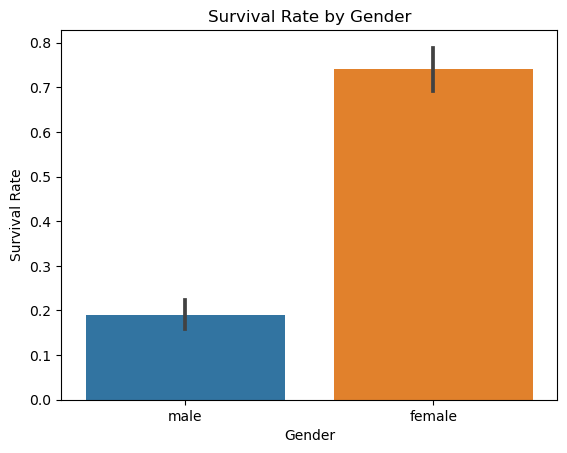

In [45]:
## Step 5: Plotting
sns.barplot(x='Sex', y='Survived', data = df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

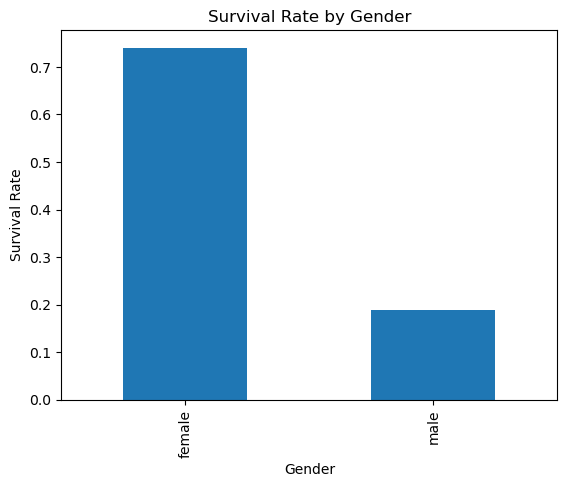

In [46]:
gender_survival = df.groupby('Sex')['Survived'].mean()
gender_survival.plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

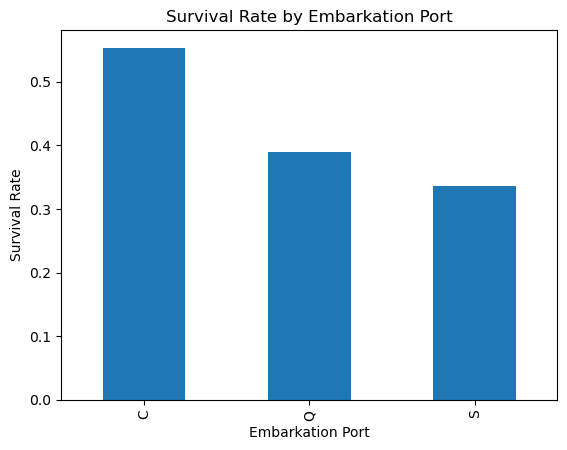

In [47]:
embarked_survival = df.groupby('Embarked')['Survived'].mean()
embarked_survival.plot(kind='bar')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')

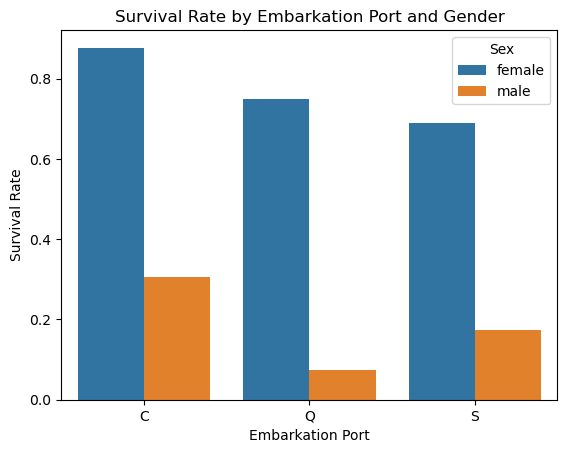

In [53]:
# Group by 'Embarked' and 'Sex', and calculate the mean survival rate
embarked_gender_survival = df.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

# Plot the bar chart with separate bars for each gender within each embarkation port
ax = sns.barplot(data=embarked_gender_survival, x='Embarked', y='Survived', hue='Sex')

plt.title('Survival Rate by Embarkation Port and Gender')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


Text(0, 0.5, 'Survival Rate')

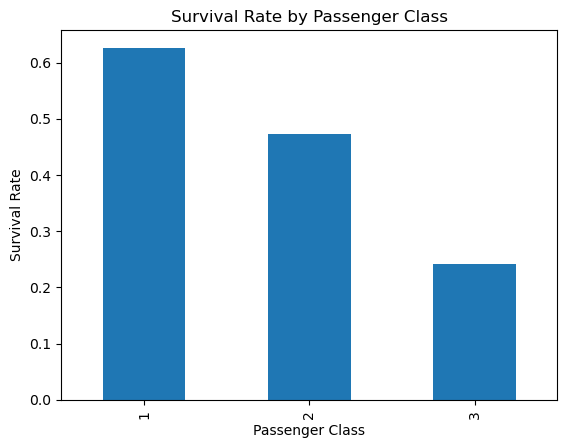

In [48]:
pclass_survival = df.groupby('Pclass')['Survived'].mean()
pclass_survival.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

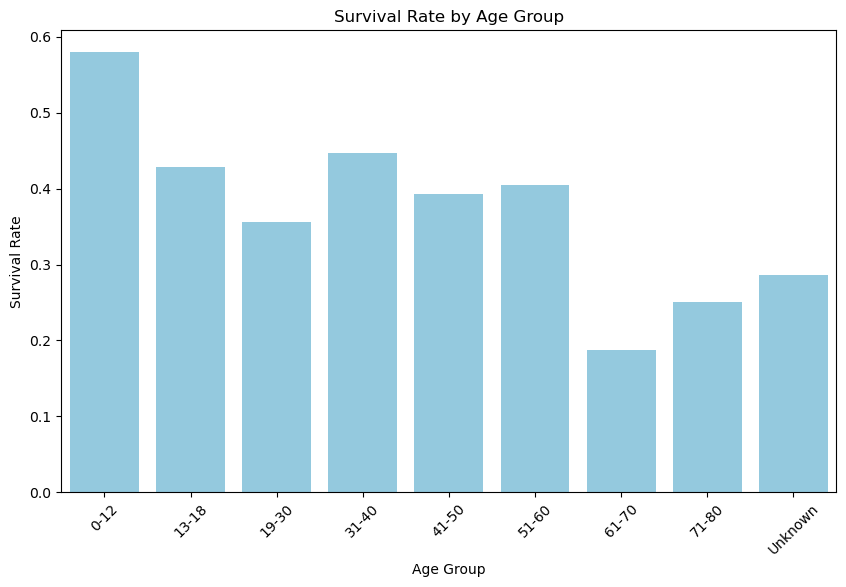

In [54]:
# Define age ranges
age_ranges = [(0, 12), (13, 18), (19, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80), (81, 90), (91, 100)]

# Categorize ages into age ranges
def categorize_age(age):
    for start, end in age_ranges:
        if start <= age <= end:
            return f'{start}-{end}'
    return 'Unknown'

# Apply age categorization to create a new column 'AgeGroup'
df['AgeGroup'] = df['Age'].apply(categorize_age)

# Group by age group and calculate survival rate
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=agegroup_survival, x='AgeGroup', y='Survived', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()